In [1]:
package 'StateImageSubsystem' {

    attribute def IStartSignal;
    attribute def IOnSignal;
    attribute def IOffSignal;
    part def HAP;
   
    action initialize { in hap : HAP; }
    action captureImages { in hap : HAP; } 
    action recordData { in hap : HAP; }
    // action compositing { in hap : HAP; }
    state def ImageSystemStates{in imagescanninghap : HAP;}
    state imagesystemstates : ImageSystemStates {
        in imagescanninghap : HAP;
        entry; then off;
        state off;
        transition off_to_starting
            first off
            accept IStartSignal 
            then starting;
        state starting;
        transition starting_to_on
            first starting
            accept IOnSignal
            then on;
        state on{
              entry action initialize {
        /* Initialize camera system */
             }   
            
            do action captureImages {
            /* Continuous image capture */
            }
            //accept EnvironmentalChange then recording;
        
            exit action recordData{
            /* Record environmental data */
            }         
     }   
        transition on_to_off
             first on
            accept IOffSignal
            then off;
        }
}

Package StateImageSubsystem (7c2856f1-d841-4b21-bccf-2208d028e51f)


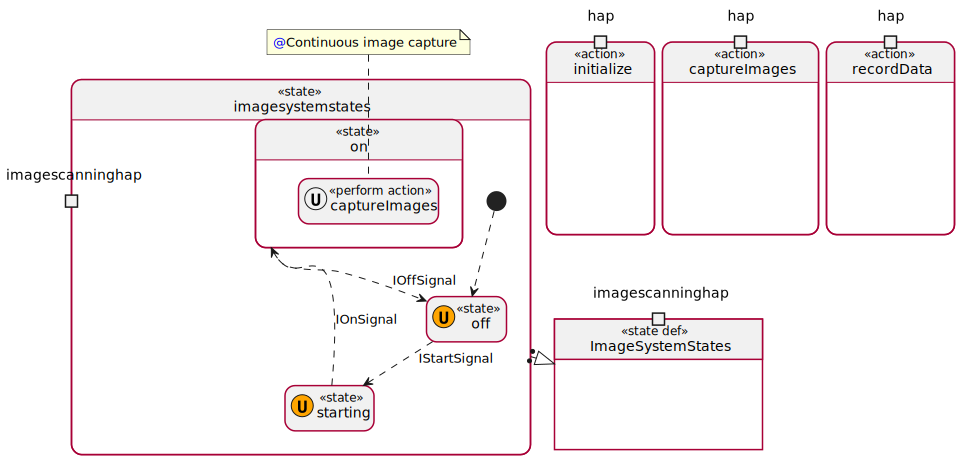

In [3]:
%viz --view ACTION --style PLANTUML  StateImageSubsystem 

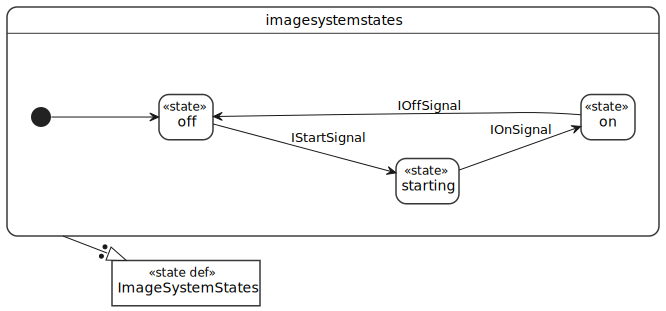

In [2]:
%viz --view STATE --style LR StateImageSubsystem  

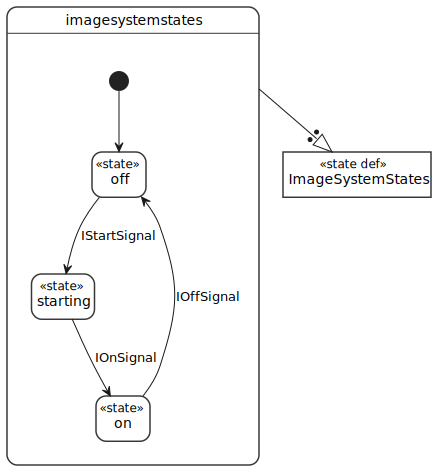

In [5]:
%viz --view STATE  StateImageSubsystem 

In [7]:
%viz -h

Usage: %viz [--view=<VIEW>] [--style=<STYLE>...] <NAME> [<NAME>...]

Visualize model elements of <NAME>(s). <NAME>s must be fully qualified.

<VIEW> is case insensitive and possible candidates are:
   DEFAULT		Automatically choose an appropriate view from the given model element names
   TREE			Show a tree-structural view, like a Block Definition Diagram (BDD)
   INTERCONNECTION	Show an interconnection view, like an Internal Block Diagram (IBD)
   STATE		Show state machines
   ACTION		Show actions like an activity diagram
   SEQUENCE		Show events and messages in a sequence diagram
   MIXED		Show multiple views

<STYLE> is also case insensitive. Multiple --style options are allowed.  The possible style names are:
  DEFAULT		Standard B&&W
  STDCOLOR		Standard style with colors
  PLANTUML		PlantUML Style
  TB			Top-to-Bottom orientation
  LR			Left-to-Right orientation
  POLYLINE		Polyline style
  ORTHOLINE		Orthogonal line style
  SHOWLIB		Show elements of the standard libraries
  SHOWIN